### Setup

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

import importlib
import utils
# Cache-Probleme umgehen
importlib.reload(utils)

from utils import hex_to_rgb_normalized

In [31]:
# Farben für Diagramme
color1 = '#9794E4' # Hellblau

### Data load

In [32]:
df_test = pd.read_csv('../data/raw/triathlon_watch_test_data_final.csv')
df_training = pd.read_csv('../data/raw/triathlon_watch_training_data_final.csv')

### First Look Data

In [33]:
df_training.head()

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
0,C0001,61.0,Other,UK,Birmingham,2.52,0.10,1.78,4.40,23.08,...,2329.95,2.0,1.0,2024-07-22,Fitness,Evening,Free,White,Yes,1.0
1,C0003,57.0,Other,Australia,Sydney,1.55,10.01,4.57,16.13,39.04,...,7904.93,2.0,1.0,2024-05-11,Fitness,Evening,Premium,Black,Yes,0.0
2,C0004,30.0,Other,India,Bangalore,1.19,12.04,8.64,21.87,71.59,...,10839.81,2.0,0.0,2024-08-16,Competition,Afternoon,Free,White,Yes,1.0
3,C0005,21.0,Male,Germany,Munich,2.25,4.67,0.92,7.84,49.09,...,NaN,3.0,0.0,2024-08-11,Recreation,Evening,Premium,Black,No,1.0
4,C0006,63.0,Male,India,Mumbai,0.80,5.88,0.67,7.35,13.91,...,3575.96,3.0,3.0,2024-11-18,Recreation,Morning,Basic,Black,Yes,0.0


In [34]:
df_training.tail()

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
995,C0996,28.0,Female,Australia,Brisbane,2.38,0.28,2.79,5.46,61.05,...,2589.77,0.0,3.0,2024-01-09,Recreation,Morning,Premium,Black,Yes,0.0
996,C0997,54.0,Female,Australia,Melbourne,1.80,4.45,1.35,7.61,34.50,...,4104.15,0.0,3.0,2024-11-09,Recreation,Afternoon,Free,Black,Yes,0.0
997,C0998,35.0,Other,USA,New York,3.91,0.57,5.57,10.05,58.63,...,5078.45,4.0,6.0,2024-08-27,Fitness,Afternoon,Premium,Black,Yes,1.0
998,C0999,31.0,Other,Germayn,Berlin,0.36,4.63,5.16,10.15,66.46,...,5184.27,3.0,3.0,2024-06-19,Fitness,Evening,Free,Black,NaN,1.0
999,C1000,27.0,Male,India,Mumbai,0.43,7.46,5.55,13.44,61.81,...,6827.69,0.0,7.0,2024-06-04,Fitness,Afternoon,Premium,Black,Yes,0.0


In [35]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             978 non-null    object 
 1   Age of customer                978 non-null    float64
 2   Sex                            978 non-null    object 
 3   Ctry                           978 non-null    object 
 4   Town                           939 non-null    object 
 5   Swimming Hours per Week        978 non-null    float64
 6   Biking Hours per Week          954 non-null    float64
 7   Running Hours per Week         978 non-null    float64
 8   Total Training Hours per Week  978 non-null    float64
 9   VO2 Max                        975 non-null    float64
 10  10k Running Time Prediction    978 non-null    float64
 11  Calories Burned per Week       959 non-null    float64
 12  Support Cases of Customer      978 non-null    fl

In [36]:
df_training.shape

(1000, 21)

### Missing/Unplausible Values

<Axes: >

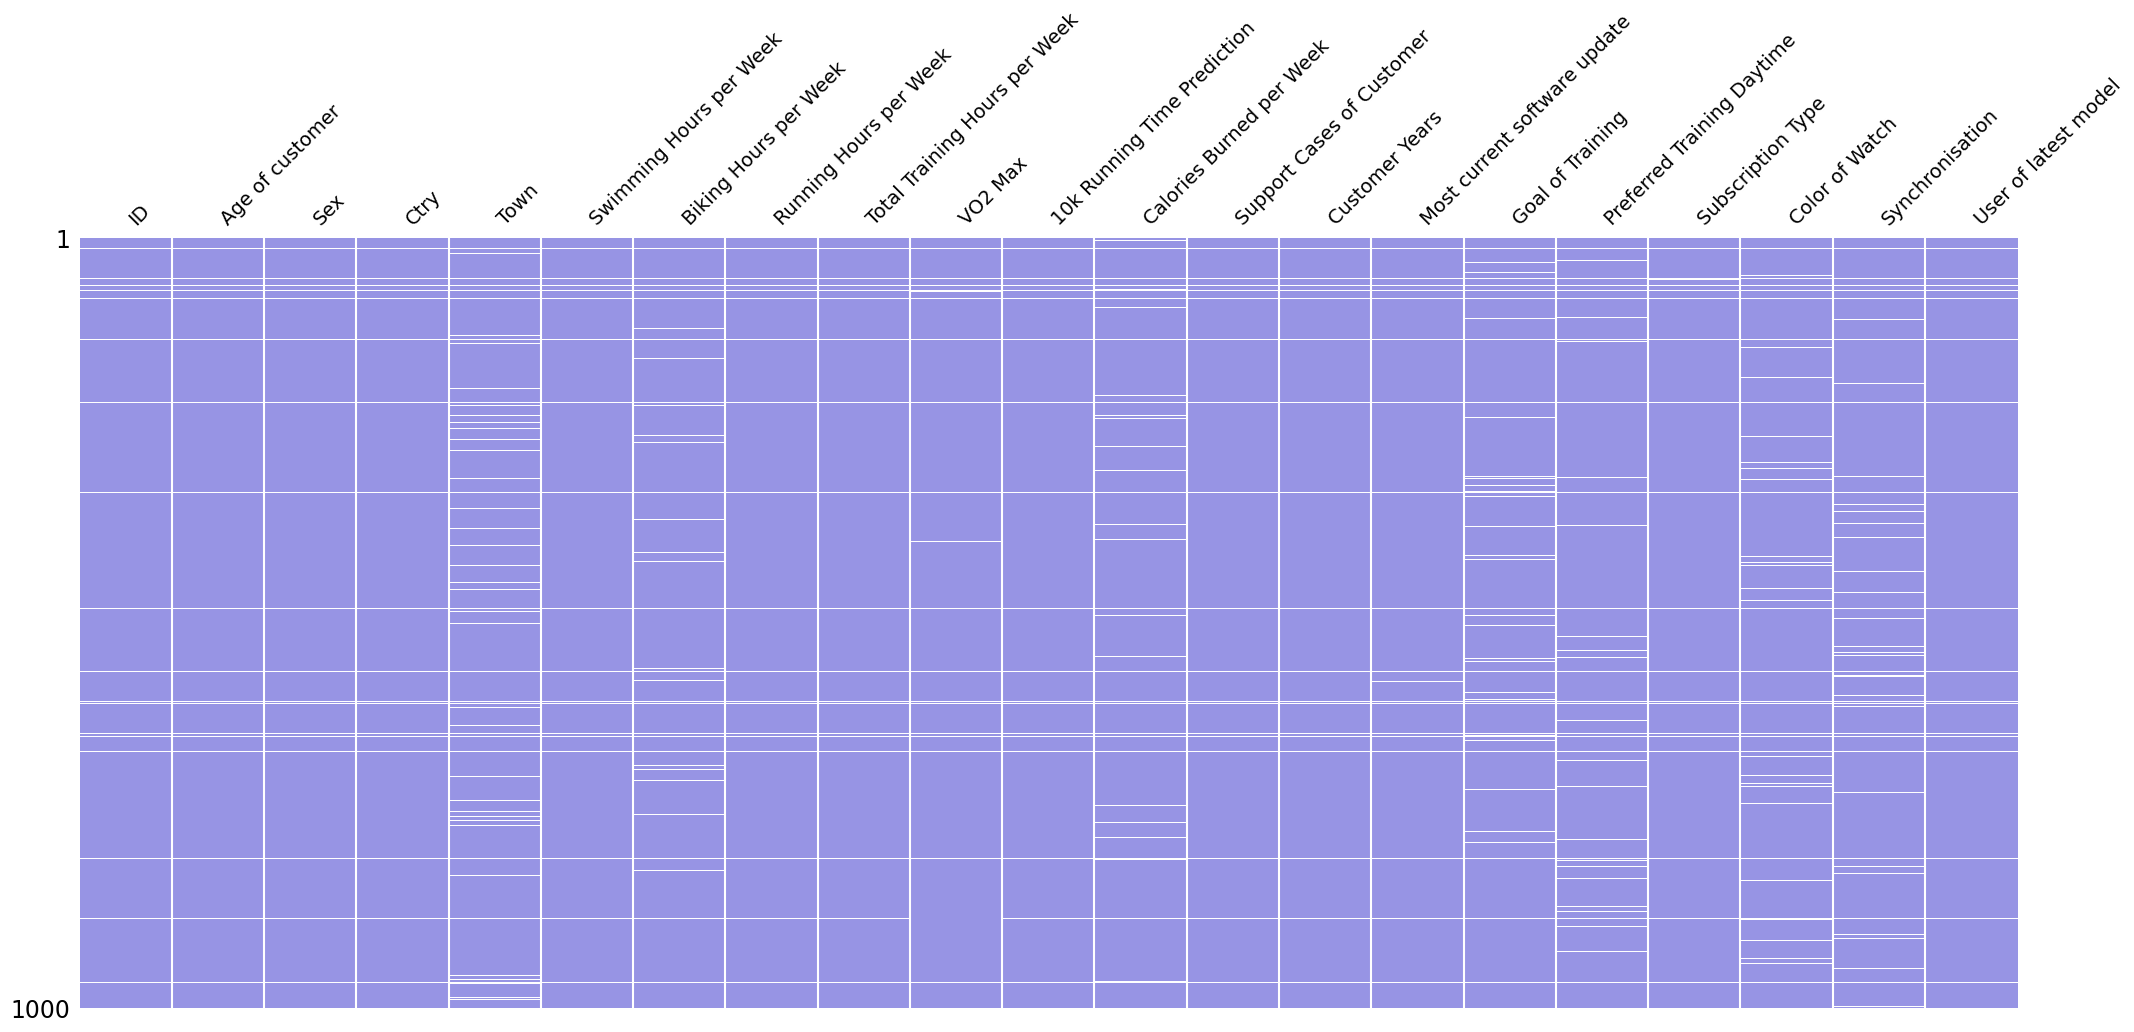

In [47]:
msno.matrix(df_training, color= hex_to_rgb_normalized(color1), fontsize=14, sparkline=False)

In [75]:
count_missing_values = pd.DataFrame(df_training.isnull().sum().sort_values(ascending=False))
count_missing_values.columns = ['Anzahl fehlender Werte']
count_missing_values

,Anzahl fehlender Werte
Town,61
Color of Watch,54
Goal of Training,50
Synchronisation,50
Biking Hours per Week,46
Preferred Training Daytime,46
Calories Burned per Week,41
VO2 Max,25
Subscription Type,23
Most current software update,23


Die Zeilen, indem das Label **User of latest model** fehlt, sollten entfernt werden.

In [78]:
count_missing_values_label = pd.DataFrame(df_training[df_training['User of latest model'].isnull()].isnull().sum().sort_values(ascending=False))
count_missing_values_label.columns = ['Anzahl fehlender Werte, wenn Label fehlt']
count_missing_values_label

,"Anzahl fehlender Werte, wenn Label fehlt"
ID,22
Age of customer,22
Sex,22
Ctry,22
Town,22
Swimming Hours per Week,22
Biking Hours per Week,22
Running Hours per Week,22
Total Training Hours per Week,22
10k Running Time Prediction,22


Bis auf einem Wert in Spalte `VO2 Max` sind alle anderen Spalten komplett leer, wenn das Label fehlt. Diese Zeilen sollten also gelöscht werden.

In [100]:
missing_values_summary = count_missing_values.join(count_missing_values_label)

In [101]:
missing_values_summary['Anzahl fehlender Werte nach entfernen der leeren Zeilen des Labels'] = missing_values_summary['Anzahl fehlender Werte'] - missing_values_summary['Anzahl fehlender Werte, wenn Label fehlt']
missing_values_summary

,Anzahl fehlender Werte,"Anzahl fehlender Werte, wenn Label fehlt",Anzahl fehlender Werte nach entfernen der leeren Zeilen des Labels
Town,61,22,39
Color of Watch,54,22,32
Goal of Training,50,22,28
Synchronisation,50,22,28
Biking Hours per Week,46,22,24
Preferred Training Daytime,46,22,24
Calories Burned per Week,41,22,19
VO2 Max,25,21,4
Subscription Type,23,22,1
Most current software update,23,22,1


In [103]:
missing_values_summary['Anzahl fehlender Werte nach entfernen der leeren Zeilen des Labels'].sum()

np.int64(200)

In [93]:
df_training[(df_training.isnull().sum(axis=1) > 2) & (df_training['User of latest model'].notnull())]

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model


In [94]:
df_training[(df_training.isnull().sum(axis=1) > 1) & (df_training['User of latest model'].notnull())]

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
217,C0217,-1.0,Female,India,NaN,2.31,NaN,4.43,13.33,40.33,...,6736.52,0.0,6.0,2024-05-10,Fitness,Evening,Free,Black,Yes,0.0
230,C0230,38.0,Other,UK,NaN,1.84,3.69,1.01,6.53,58.59,...,NaN,1.0,8.0,2023-12-19,Recreation,Evening,Free,Black,Yes,0.0
309,C0310,64.0,Male,Germany,Berlin,2.04,1.77,6.56,10.37,18.90,...,5254.97,4.0,1.0,2024-06-07,NaN,Afternoon,Basic,Black,NaN,0.0
312,C0313,28.0,Other,USA,NaN,0.00,9.84,5.78,15.62,67.25,...,8037.13,3.0,3.0,2024-04-01,NaN,Afternoon,Basic,White,Yes,1.0
425,C0426,29.0,Other,UK,NaN,2.70,5.21,2.13,10.04,57.51,...,4775.57,3.0,2.0,2024-02-28,Competition,Morning,Free,NaN,Yes,1.0
490,C0491,20.0,Female,Australia,Sydney,2.45,4.73,6.53,13.71,59.61,...,NaN,3.0,2.0,2024-11-26,NaN,Morning,Free,Black,Yes,1.0
712,C0707,19.0,Other,Australia,Melbourne,2.62,7.40,1.60,11.62,54.03,...,5962.87,4.0,1.0,2024-07-17,Fitness,NaN,Premium,NaN,Yes,1.0
719,C0714,31.0,Female,Australia,Melbourne,3.05,NaN,5.22,10.77,63.79,...,5525.89,3.0,5.0,2024-05-30,NaN,Morning,Basic,Black,Yes,1.0
816,C0816,59.0,Male,India,Delhi,0.82,4.92,1.95,7.70,26.12,...,4063.31,4.0,3.0,2024-12-08,Fitness,NaN,Basic,Black,NaN,0.0


Wenn die Zeilen gelöscht werden, in denen das Label NaN ist, wird keine weitere zeilenweise Löschung empfohlen. Es tritt kein Fall auf, bei dem innerhalb einer Zeile mehr als 2 Werte fehlen. Eine einfache Löschung dieser Zeilen, würde zu viele Informationen eleminieren. Für das Füllen der restlichen 200 fehlenden Werte muss eine andere Taktik verwendet werden.

In [109]:
# Betrachtung der Spalten, in denen nach der zeilenweisen Löschung noch fehlende Werte vorhanden sind
filtered_df = df_training[(df_training.isnull().sum(axis=1) > 0) & (df_training['User of latest model'].notnull())]
filtered_df[filtered_df.columns[filtered_df.isnull().any()]]

,Town,Biking Hours per Week,VO2 Max,Calories Burned per Week,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation
3,Munich,4.67,49.0900,NaN,2024-08-11,Recreation,Evening,Premium,Black,No
6,NaN,4.06,247.2578,4835.71,2024-02-03,Recreation,Afternoon,Free,Black,Yes
20,NaN,10.88,25.6600,6184.35,2023-11-10,Competition,Evening,Premium,Black,Yes
29,Brisbane,11.39,65.3100,10017.66,2024-09-13,Competition,NaN,Basic,Black,Yes
31,Mumbai,11.48,45.9500,9604.77,2023-12-30,NaN,Afternoon,Basic,Black,Yes
...,...,...,...,...,...,...,...,...,...,...
984,Berlin,0.62,55.1000,3192.00,2023-12-02,Recreation,Morning,Free,White,NaN
986,NaN,3.35,56.3100,4031.71,2024-02-19,Recreation,Morning,Premium,Black,Yes
988,NaN,2.89,60.0800,4700.03,2024-01-07,Fitness,Morning,Premium,White,Yes
989,Birmingham,9.52,57.0100,8858.12,2024-08-14,Fitness,NaN,Premium,White,Yes


- Die Spalten `Biking Hours per Week`, `VO2 Max`, `Calories Burned per Week` sind numerisch. Hier könnte es Sinn machen, eine Regression Imputation zu verwenden, falls sich in der nachfolgenden EDA aufzeigt, dass diese Werte mit anderen korrelieren.
- Für die Spalte `Town` könnte eine regelbasierte Imputation angewandt werden. Je nach Land (`Ctry`) sind nur bestimmte Städte in der Kombination möglich.
- Für die restlichen Spalten kann erst eine Empfehlung gegeben werden, nach weiterer Sichtung der Daten.

In [118]:
unique_combinations = (
    df_training
    .groupby(['Ctry', 'Town'], dropna=False) # Schließt beim Groupby NaN-Werte ein
    .size()  # Zählen der Häufigkeiten
    .reset_index(name='Count')  # Zurücksetzen des Index und Spalte 'Count' benennen
)
unique_combinations.sort_values(by=['Ctry', 'Count'], ascending=False).reset_index(drop=True)

,Ctry,Town,Count
0,UnknownLand,Berlin,1
1,UnknownLand,Brisbane,1
2,UnknownLand,London,1
3,UnknownLand,NaN,1
4,USA,New York,72
5,USA,Chicago,64
6,USA,Los Angeles,56
7,USA,NaN,7
8,UK,Birmingham,70
9,UK,Manchester,58


Hier wird deutlich, dass bspw. eine fehlende Stadt mit dem Land `Australia`, nur die Werte `Sydney`, `Melbourne` oder `Brisbane` annehmen kann. Je nach Zusammenhang mit den anderen Spalten, kann aufgrund anderer Informationen besser entschieden werden, welche von den 3 Möglichkeiten die sinnvollste ist.  
Die Übersicht zeigt ebenfalls, dass innerhalb des Datensatzes auch unplausible Werte auftreten können wie `UnknownLand` oder `Germayn`. Daher werden die Spalten, mit wenig Ausprägungen im Folgenden noch auf unplausible Werte untersucht.

Um den Fehler `UnknownLand` zu beheben, kann eine umgekehrte Logik wie für die Imputation von `Town` angewendet werden. 
- Berlin &rarr; Germany
- London &rarr; UK
- Brisbane &rarr; Australia 

`Germayn` sollte zu `Germany` umgeändert werden.

Diese Anpassungen sollte vor der Imputation von Town erfolgen, da man so mehr Informationen gewinnt.

In [119]:
for col in df_training.columns:
    unique_count = df_training[col].nunique()
    print(f"Spalte: {col}, Anzahl eindeutiger Werte: {unique_count}")

Spalte: ID, Anzahl eindeutiger Werte: 971
Spalte: Age of customer, Anzahl eindeutiger Werte: 48
Spalte: Sex, Anzahl eindeutiger Werte: 3
Spalte: Ctry, Anzahl eindeutiger Werte: 7
Spalte: Town, Anzahl eindeutiger Werte: 15
Spalte: Swimming Hours per Week, Anzahl eindeutiger Werte: 440
Spalte: Biking Hours per Week, Anzahl eindeutiger Werte: 649
Spalte: Running Hours per Week, Anzahl eindeutiger Werte: 542
Spalte: Total Training Hours per Week, Anzahl eindeutiger Werte: 732
Spalte: VO2 Max, Anzahl eindeutiger Werte: 858
Spalte: 10k Running Time Prediction, Anzahl eindeutiger Werte: 805
Spalte: Calories Burned per Week, Anzahl eindeutiger Werte: 948
Spalte: Support Cases of Customer, Anzahl eindeutiger Werte: 5
Spalte: Customer Years, Anzahl eindeutiger Werte: 12
Spalte: Most current software update, Anzahl eindeutiger Werte: 393
Spalte: Goal of Training, Anzahl eindeutiger Werte: 3
Spalte: Preferred Training Daytime, Anzahl eindeutiger Werte: 3
Spalte: Subscription Type, Anzahl eindeutig

In [124]:
for col in df_training.columns:
    unique_count = df_training[col].nunique()
    if unique_count < 50:  # Bedingung: nur Spalten mit weniger als 50 eindeutigen Werten
        unique_values = df_training[col].unique()

        # Umwandlung der Werte in native Python-Typen
        unique_values_converted = [float(x) if isinstance(x, np.float64) else x for x in unique_values]

        # NaN-Werte an das Ende verschieben und sortieren
        unique_values_sorted = sorted(unique_values_converted, key=lambda x: (isinstance(x, float) and np.isnan(x), x))

        print(f"Spalte: {col}, Anzahl eindeutiger Werte: {unique_count}")
        print("Eindeutige Werte:", unique_values_sorted)
        print("="*50)  # Trennung für bessere Lesbarkeit



Spalte: Age of customer, Anzahl eindeutiger Werte: 48
Eindeutige Werte: [-1.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, nan]
Spalte: Sex, Anzahl eindeutiger Werte: 3
Eindeutige Werte: ['Female', 'Male', 'Other', nan]
Spalte: Ctry, Anzahl eindeutiger Werte: 7
Eindeutige Werte: ['Australia', 'Germany', 'Germayn', 'India', 'UK', 'USA', 'UnknownLand', nan]
Spalte: Town, Anzahl eindeutiger Werte: 15
Eindeutige Werte: ['Bangalore', 'Berlin', 'Birmingham', 'Brisbane', 'Chicago', 'Delhi', 'Hamburg', 'London', 'Los Angeles', 'Manchester', 'Melbourne', 'Mumbai', 'Munich', 'New York', 'Sydney', nan]
Spalte: Support Cases of Customer, Anzahl eindeutiger Werte: 5
Eindeutige Werte: [0.0, 1.0, 2.0, 3.0, 4.0, nan]
Spalte: Customer Years, Anzahl eindeutiger Werte: 1

Neben den bereits gefunden unplausiblen Werten in `Ctry` gibt es ebenfalls einen unplausiblen Wert für `Age of customer`: **-1**  
Dieser sollte ebenfalls wie ein fehlender Wert behandelt werden.  
Für numerische stetige Features können unplausible Werte entdeckt werden, wenn sie als Ausreißer erkannt werden. 